In [41]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [42]:
df = pd.read_csv(
    r"C:\Users\rahul\OneDrive\Desktop\anitha\DSA\project air qulity and water quality\data set\air_quality_data.csv"
)

In [43]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        3349 non-null   object 
 1   Date        3349 non-null   object 
 2   PM2.5       3343 non-null   float64
 3   PM10        3343 non-null   float64
 4   NO2         3343 non-null   float64
 5   SO2         3343 non-null   float64
 6   O3          3343 non-null   float64
 7   AQI         3343 non-null   float64
 8   AQI_Bucket  3343 non-null   object 
dtypes: float64(6), object(3)
memory usage: 235.6+ KB


<Axes: xlabel='AQI_Bucket'>

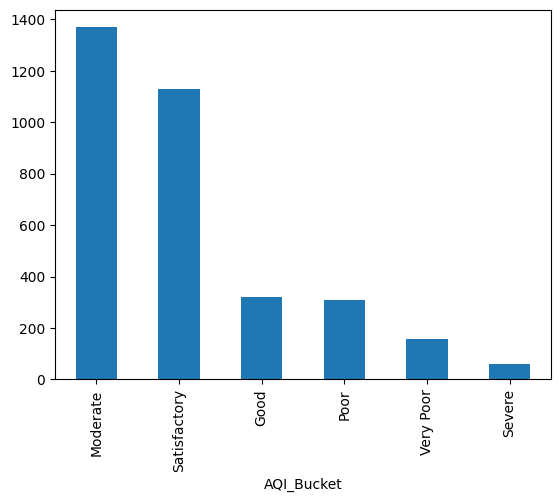

In [44]:
df["AQI_Bucket"].value_counts() 
df["AQI_Bucket"].value_counts().plot(kind='bar')


In [45]:
#classify
def classify_health_status(bucket):
    if bucket in ['Good', 'Satisfactory']:
        return 'Healthy'
    else:
        return 'Unhealthy'

# Apply classification
df['Health_Class'] =df['AQI_Bucket'].apply(classify_health_status)

<Axes: xlabel='Health_Class'>

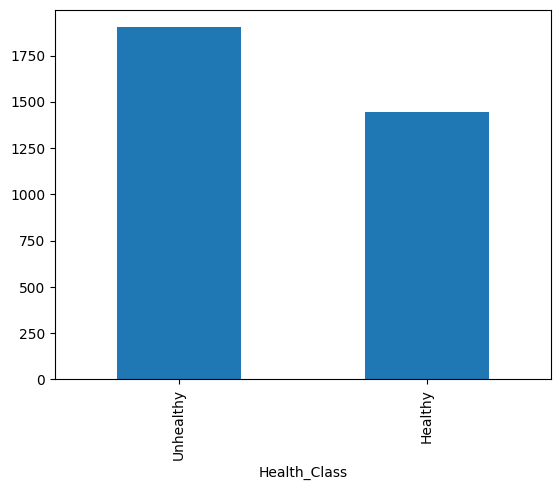

In [46]:
df["Health_Class"].value_counts()
df["Health_Class"].value_counts().plot(kind='bar')


In [47]:
df.isna().sum()
df.dropna(inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)    
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3343 entries, 0 to 3348
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          3343 non-null   object 
 1   Date          3343 non-null   object 
 2   PM2.5         3343 non-null   float64
 3   PM10          3343 non-null   float64
 4   NO2           3343 non-null   float64
 5   SO2           3343 non-null   float64
 6   O3            3343 non-null   float64
 7   AQI           3343 non-null   float64
 8   AQI_Bucket    3343 non-null   object 
 9   Health_Class  3343 non-null   object 
dtypes: float64(6), object(4)
memory usage: 287.3+ KB


In [48]:
num_dt = df.select_dtypes(include="number")
cat_dt = df.select_dtypes(include="object")
num_cols = num_dt.columns.to_list()
cat_cols = cat_dt.columns.to_list()
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI']
Categorical Columns: ['City', 'Date', 'AQI_Bucket', 'Health_Class']


In [49]:
for col in num_dt.columns:
    if num_dt[col].skew() >= 0 and num_dt[col].skew() <= 0.5:
        num_dt[col] = num_dt[col].fillna(num_dt[col].mean())
    else:
        num_dt[col] = num_dt[col].fillna(num_dt[col].median())

In [50]:
for col in cat_dt.columns:
    cat_dt[col] = cat_dt[col].fillna(cat_dt[col].mode()[0])

In [51]:
df = pd.concat([num_dt, cat_dt], axis=1)

In [52]:
df.select_dtypes(include=["object"]).columns.tolist()

['City', 'Date', 'AQI_Bucket', 'Health_Class']

In [53]:
df.shape
df.head()


,PM2.5,PM10,NO2,SO2,O3,AQI,City,Date,AQI_Bucket,Health_Class
0,230.50,355.43,61.28,24.28,75.14,370.0,Delhi,2022-01-13,Very Poor,Unhealthy
1,191.47,308.74,54.37,22.47,64.80,365.0,Delhi,2022-01-14,Very Poor,Unhealthy
2,177.71,309.85,52.51,19.12,59.73,352.0,Delhi,2022-01-15,Very Poor,Unhealthy
3,133.56,231.04,46.86,19.06,54.00,278.0,Delhi,2022-01-16,Poor,Unhealthy
4,235.06,353.55,47.86,14.48,64.10,350.0,Delhi,2022-01-17,Very Poor,Unhealthy


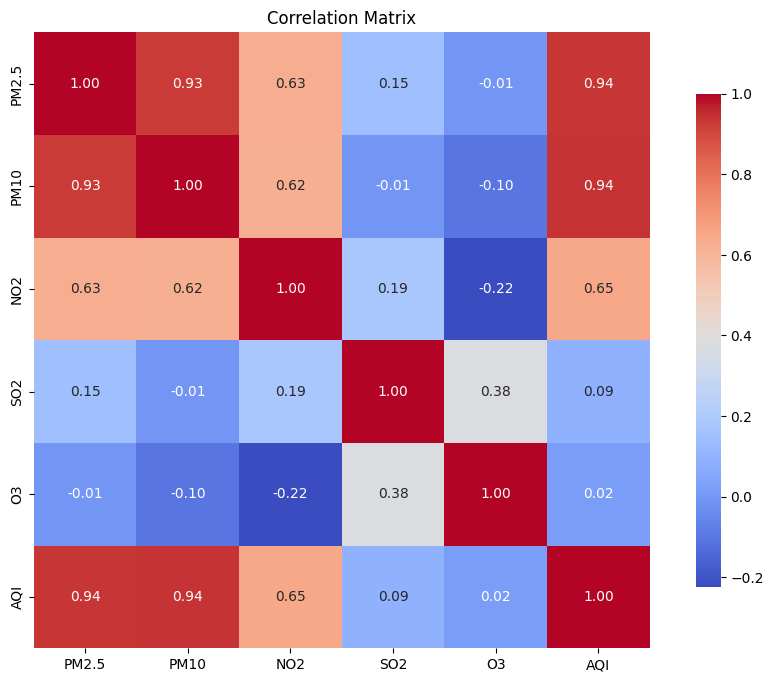

In [54]:
df1=df.drop(columns=["AQI_Bucket", "Health_Class","City","Date"], axis=1)
corr_matrix = df1.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


In [55]:
results= pd.DataFrame({'Model': [], 'MSE': [], 'R2 Score': []})  # Initialize results dictionary
                     

In [56]:
print(df1.head() 
      )

    PM2.5    PM10    NO2    SO2     O3    AQI
0  230.50  355.43  61.28  24.28  75.14  370.0
1  191.47  308.74  54.37  22.47  64.80  365.0
2  177.71  309.85  52.51  19.12  59.73  352.0
3  133.56  231.04  46.86  19.06  54.00  278.0
4  235.06  353.55  47.86  14.48  64.10  350.0


In [57]:
df.columns


Index(['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI', 'City', 'Date',
       'AQI_Bucket', 'Health_Class'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['AQI','City', 'Date','AQI_Bucket', 'Health_Class'])  # Features
x = pd.get_dummies(x, drop_first=True)  # Convert categorical variables to dummy variables
y=df['AQI']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets



In [59]:

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()  # Initialize Linear Regression model
lr_model.fit(x_train, y_train)  # Fit the model on training data
y_lr_pred = lr_model.predict(x_test)  # Predict on test data
mse_lr = mean_squared_error(y_test, y_lr_pred)  # Calculate Mean Squared Error
r2_lr = r2_score(y_test, y_lr_pred)  # Calculate R-squared
print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")
lr_model_df = pd.DataFrame({'Model': ' Linear Regression', 'MSE': mse_lr, 'R2 Score': r2_lr}, index=[0])  # Store results in DataFrame
results = pd.concat([results, lr_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame


Linear Regression Mean Squared Error: 487.15334481389385
Linear Regression R-squared: 0.937249360799119
                Model         MSE  R2 Score
0   Linear Regression  487.153345  0.937249


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Initialize Standard Scaler
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data
x_test_scaled = scaler.transform(x_test)  # Transform test data
lr_model_scaled = LinearRegression()  # Initialize Linear Regression model
lr_model_scaled.fit(x_train_scaled, y_train)  # Fit the model on scaled training data
y_pred_lr_scaled = lr_model_scaled.predict(x_test_scaled)  # Predict on scaled test
mse_lr_scaled = mean_squared_error(y_test, y_pred_lr_scaled)  # Calculate Mean Squared Error
r2_lr_scaled = r2_score(y_test, y_pred_lr_scaled)  # Calculate  R-squared
print(f"Scaled Linear Regression Mean Squared Error: {mse_lr_scaled}")
print(f"Scaled Linear Regression R-squared: {r2_lr_scaled}")
scaled_model_df = pd.DataFrame({'Model': 'Scaled Linear Regression', 'MSE': mse_lr_scaled, 'R2 Score': r2_lr_scaled}, index=[0])  # Store results in DataFrame
results = pd.concat([results, scaled_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame


Scaled Linear Regression Mean Squared Error: 487.1533448138935
Scaled Linear Regression R-squared: 0.9372493607991191
                      Model         MSE  R2 Score
0         Linear Regression  487.153345  0.937249
1  Scaled Linear Regression  487.153345  0.937249


In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Initialize polynomial features with degree 2 
x_poly = poly.fit_transform(x_train)  # Transform training features
poly_model = LinearRegression()  # Initialize Polynomial Regression model
poly_model.fit(x_poly, y_train)  # Fit the model on polynomial features
y_poly_pred = poly_model.predict(poly.transform(x_test))  # Predict on test data
mse_poly = mean_squared_error(y_test, y_poly_pred)  # Calculate Mean Squared Error
r2_poly = r2_score(y_test, y_poly_pred)  # Calculate R-squared
print(f"Polynomial Regression Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression R-squared: {r2_poly}")
poly_model_df = pd.DataFrame({'Model': 'Polynomial Regression', 'MSE': mse_poly, 'R2 Score': r2_poly}, index=[0])  # Store results in DataFrame
results = pd.concat([results, poly_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame


Polynomial Regression Mean Squared Error: 315.22859122884904
Polynomial Regression R-squared: 0.9593951354238155
                      Model         MSE  R2 Score
0         Linear Regression  487.153345  0.937249
1  Scaled Linear Regression  487.153345  0.937249
2     Polynomial Regression  315.228591  0.959395


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Initialize Standard Scaler
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data
x_test_scaled = scaler.transform(x_test)  # Transform test data
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')  # Initialize Support Vector Regression model with RBF kernel
svr_model.fit(x_train_scaled, y_train)  # Fit the model on scaled training data
y_svr_pred = svr_model.predict(x_test_scaled)  # Predict on scaled test data    
mse_svr = mean_squared_error(y_test, y_svr_pred)  # Calculate Mean Squared Error
r2_svr = r2_score(y_test, y_svr_pred)  # Calculate R-squared
print(f"Support Vector Regression Mean Squared Error: {mse_svr}")
print(f"Support Vector Regression R-squared: {r2_svr}")
svr_model_df = pd.DataFrame({'Model': 'Support Vector Regression', 'MSE': mse_svr, 'R2 Score': r2_svr}, index=[0])  # Store results in DataFrame
results = pd.concat([results, svr_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame


Support Vector Regression Mean Squared Error: 1887.4437582190938
Support Vector Regression R-squared: 0.756876754424815
                       Model          MSE  R2 Score
0          Linear Regression   487.153345  0.937249
1   Scaled Linear Regression   487.153345  0.937249
2      Polynomial Regression   315.228591  0.959395
3  Support Vector Regression  1887.443758  0.756877


In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Initialize K-Nearest Neighbors model
knn_model.fit(x_train_scaled, y_train)  # Fit the model on scaled training data
y_knn_pred = knn_model.predict(x_test_scaled)  # Predict on scaled test
mse_knn = mean_squared_error(y_test, y_knn_pred)  # Calculate Mean Squared Error
r2_knn = r2_score(y_test, y_knn_pred)  # Calculate R-squared
print(f"K-Nearest Neighbors Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors R-squared: {r2_knn}")
knn_model_df = pd.DataFrame({'Model': 'K-Nearest Neighbors', 'MSE': mse_knn, 'R2 Score': r2_knn}, index=[0])  # Store results in DataFrame
results = pd.concat([results, knn_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame 


K-Nearest Neighbors Mean Squared Error: 267.9284213016995
K-Nearest Neighbors R-squared: 0.9654879107867206
                       Model          MSE  R2 Score
0          Linear Regression   487.153345  0.937249
1   Scaled Linear Regression   487.153345  0.937249
2      Polynomial Regression   315.228591  0.959395
3  Support Vector Regression  1887.443758  0.756877
4        K-Nearest Neighbors   267.928421  0.965488


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Initialize Min-Max Scaler
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data   
x_test_scaled = scaler.transform(x_test)  # Transform test data
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Initialize K-Nearest Neighbors model
knn_model.fit(x_train_scaled, y_train)  # Fit the model on scaled training data
y_knn_pred = knn_model.predict(x_test_scaled)  # Predict on scaled test data
from sklearn.metrics import mean_squared_error, r2_score
mse_knn = mean_squared_error(y_test, y_knn_pred)  # Calculate Mean Squared Error
r2_knn = r2_score(y_test, y_knn_pred)  # Calculate R-squared
print(f"K-Nearest Neighbors Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors R-squared: {r2_knn}")
knn_model_df = pd.DataFrame({'Model': 'K-Nearest Neighbors with MINMAX', 'MSE': mse_knn, 'R2 Score': r2_knn}, index=[0])  # Store results in DataFrame
results = pd.concat([results, knn_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame


K-Nearest Neighbors Mean Squared Error: 248.8032912876051
K-Nearest Neighbors R-squared: 0.9679514351491426
                             Model          MSE  R2 Score
0                Linear Regression   487.153345  0.937249
1         Scaled Linear Regression   487.153345  0.937249
2            Polynomial Regression   315.228591  0.959395
3        Support Vector Regression  1887.443758  0.756877
4              K-Nearest Neighbors   267.928421  0.965488
5  K-Nearest Neighbors with MINMAX   248.803291  0.967951


In [65]:


from sklearn.preprocessing import StandardScaler         
scaler = StandardScaler()  # Initialize Standard Scaler
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data   
x_test_scaled = scaler.transform(x_test)  # Transform test data
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Initialize K-Nearest Neighbors model
knn_model.fit(x_train_scaled, y_train)  # Fit the model on scaled training data
y_knn_pred = knn_model.predict(x_test_scaled)  # Predict on scaled test data
from sklearn.metrics import mean_squared_error, r2_score
mse_knn = mean_squared_error(y_test, y_knn_pred)  # Calculate Mean Squared Error
r2_knn = r2_score(y_test, y_knn_pred)  # Calculate R-squared
print(f"K-Nearest Neighbors Mean Squared Error: {mse_knn}") 
print(f"K-Nearest Neighbors R-squared: {r2_knn}")
knn_model_df = pd.DataFrame({'Model': 'K-Nearest Neighbors std scale', 'MSE': mse_knn, 'R2 Score': r2_knn}, index=[0])  # Store results in DataFrame
results = pd.concat([results, knn_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame     


K-Nearest Neighbors Mean Squared Error: 267.9284213016995
K-Nearest Neighbors R-squared: 0.9654879107867206
                             Model          MSE  R2 Score
0                Linear Regression   487.153345  0.937249
1         Scaled Linear Regression   487.153345  0.937249
2            Polynomial Regression   315.228591  0.959395
3        Support Vector Regression  1887.443758  0.756877
4              K-Nearest Neighbors   267.928421  0.965488
5  K-Nearest Neighbors with MINMAX   248.803291  0.967951
6    K-Nearest Neighbors std scale   267.928421  0.965488


In [66]:


from sklearn.preprocessing import normalize
x_train_normalized = normalize(x_train)  # Normalize training data  
x_test_normalized = normalize(x_test)  # Normalize test data
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Initialize K-Nearest Neighbors model
knn_model.fit(x_train_normalized, y_train)  # Fit the model on normalized training data
y_knn_pred = knn_model.predict(x_test_normalized)  # Predict on normalized test data
mse_knn = mean_squared_error(y_test, y_knn_pred)  # Calculate Mean Squared Error
r2_knn = r2_score(y_test, y_knn_pred)  # Calculate R-squared
print(f"K-Nearest Neighbors Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors R-squared: {r2_knn}")
knn_model_df = pd.DataFrame({'Model': 'K-Nearest Neighbors_normalized', 'MSE': mse_knn, 'R2 Score': r2_knn}, index=[0])  # Store results in DataFrame
results = pd.concat([results, knn_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame




K-Nearest Neighbors Mean Squared Error: 837.9422081732624
K-Nearest Neighbors R-squared: 0.8920639471410026
                             Model          MSE  R2 Score
0                Linear Regression   487.153345  0.937249
1         Scaled Linear Regression   487.153345  0.937249
2            Polynomial Regression   315.228591  0.959395
3        Support Vector Regression  1887.443758  0.756877
4              K-Nearest Neighbors   267.928421  0.965488
5  K-Nearest Neighbors with MINMAX   248.803291  0.967951
6    K-Nearest Neighbors std scale   267.928421  0.965488
7   K-Nearest Neighbors_normalized   837.942208  0.892064


In [67]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)  # Initialize Lasso Regression model 
lasso_model.fit(x_train_scaled, y_train)  # Fit the model on scaled training data
y_lasso_pred = lasso_model.predict(x_test_scaled)  # Predict on scaled test
mse_lasso = mean_squared_error(y_test, y_lasso_pred)  # Calculate Mean Squared Error
r2_lasso = r2_score(y_test, y_lasso_pred)  # Calculate R-squared
print(f"Lasso Regression Mean Squared Error: {mse_lasso}")  
print(f"Lasso Regression R-squared: {r2_lasso}")
lasso_model_df = pd.DataFrame({'Model': 'Lasso Regression', 'MSE': mse_lasso, 'R2 Score': r2_lasso}, index=[0])  # Store results in DataFrame
results = pd.concat([results, lasso_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame


Lasso Regression Mean Squared Error: 486.8113600296037
Lasso Regression R-squared: 0.9372934121518187
                             Model          MSE  R2 Score
0                Linear Regression   487.153345  0.937249
1         Scaled Linear Regression   487.153345  0.937249
2            Polynomial Regression   315.228591  0.959395
3        Support Vector Regression  1887.443758  0.756877
4              K-Nearest Neighbors   267.928421  0.965488
5  K-Nearest Neighbors with MINMAX   248.803291  0.967951
6    K-Nearest Neighbors std scale   267.928421  0.965488
7   K-Nearest Neighbors_normalized   837.942208  0.892064
8                 Lasso Regression   486.811360  0.937293


In [68]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)  # Initialize Ridge Regression model
ridge_model.fit(x_train_scaled, y_train)  # Fit the model on scaled training data
y_ridge_pred = ridge_model.predict(x_test_scaled)  # Predict on scaled test
mse_ridge = mean_squared_error(y_test, y_ridge_pred)  # Calculate Mean Squared Error
r2_ridge = r2_score(y_test, y_ridge_pred)  # Calculate R-squared
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")
ridge_model_df = pd.DataFrame({'Model': 'Ridge Regression', 'MSE': mse_ridge, 'R2 Score': r2_ridge}, index=[0])  # Store results in DataFrame
results = pd.concat([results, ridge_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame


Ridge Regression Mean Squared Error: 487.1442744563968
Ridge Regression R-squared: 0.9372505291596298
                             Model          MSE  R2 Score
0                Linear Regression   487.153345  0.937249
1         Scaled Linear Regression   487.153345  0.937249
2            Polynomial Regression   315.228591  0.959395
3        Support Vector Regression  1887.443758  0.756877
4              K-Nearest Neighbors   267.928421  0.965488
5  K-Nearest Neighbors with MINMAX   248.803291  0.967951
6    K-Nearest Neighbors std scale   267.928421  0.965488
7   K-Nearest Neighbors_normalized   837.942208  0.892064
8                 Lasso Regression   486.811360  0.937293
9                 Ridge Regression   487.144274  0.937251


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
Random_Forest_Regression = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize the Random Forest model
Random_Forest_Regression.fit(x_train, y_train)  # Fit the model on the training data
y_pred_rf =Random_Forest_Regression.predict(x_test)  # Predict on the test data
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Calculate Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)  # Calculate R-squared
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")
Random_Forest_Regression_df = pd.DataFrame({'Model': 'Random Forest Regression', 'MSE': mse_rf, 'R2 Score': r2_rf}, index=[0])  # Store results in DataFrame
results = pd.concat([results, Random_Forest_Regression_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame




Random Forest Mean Squared Error: 188.91792624792396
Random Forest R-squared: 0.9756653202636001
                              Model          MSE  R2 Score
0                 Linear Regression   487.153345  0.937249
1          Scaled Linear Regression   487.153345  0.937249
2             Polynomial Regression   315.228591  0.959395
3         Support Vector Regression  1887.443758  0.756877
4               K-Nearest Neighbors   267.928421  0.965488
5   K-Nearest Neighbors with MINMAX   248.803291  0.967951
6     K-Nearest Neighbors std scale   267.928421  0.965488
7    K-Nearest Neighbors_normalized   837.942208  0.892064
8                  Lasso Regression   486.811360  0.937293
9                  Ridge Regression   487.144274  0.937251
10         Random Forest Regression   188.917926  0.975665


In [70]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees_model = ExtraTreesRegressor()  # Initialize the Extra Trees model
extra_trees_model.fit(x_train, y_train)  # Fit the model on the training data
y_pred_extra = extra_trees_model.predict(x_test)  # Predict on the test data
mse_extra = mean_squared_error(y_test, y_pred_extra)  # Calculate Mean Squared Error
r2_extra = r2_score(y_test, y_pred_extra)  # Calculate R-squared
print(f"Extra Trees Mean Squared Error: {mse_extra}")
print(f"Extra Trees R-squared: {r2_extra}")
extra_trees_model_df = pd.DataFrame({'Model': 'Extra Trees Regression', 'MSE': mse_extra, 'R2 Score': r2_extra}, index=[0])  # Store results in DataFrame
results = pd.concat([results, extra_trees_model_df], ignore_index=True)  # Append the results
print(results)  # Display the results DataFrame



Extra Trees Mean Squared Error: 185.8598285947395
Extra Trees R-squared: 0.9760592364391102
                              Model          MSE  R2 Score
0                 Linear Regression   487.153345  0.937249
1          Scaled Linear Regression   487.153345  0.937249
2             Polynomial Regression   315.228591  0.959395
3         Support Vector Regression  1887.443758  0.756877
4               K-Nearest Neighbors   267.928421  0.965488
5   K-Nearest Neighbors with MINMAX   248.803291  0.967951
6     K-Nearest Neighbors std scale   267.928421  0.965488
7    K-Nearest Neighbors_normalized   837.942208  0.892064
8                  Lasso Regression   486.811360  0.937293
9                  Ridge Regression   487.144274  0.937251
10         Random Forest Regression   188.917926  0.975665
11           Extra Trees Regression   185.859829  0.976059


In [71]:
import pickle
with open ('air_reg.pkl',"wb") as f:
    pickle.dump(Random_Forest_Regression,f)

In [72]:
results.to_csv('Air_quality_model_regg.csv', index=False)  # Save results to CSV file